In [1]:
import zipfile

# Specify the path to the zip file you want to unzip
zip_file_path = "/content/A1_DATASET.zip"

# Specify the directory where you want to extract the contents
extracted_dir_path = "/content/A1_DATASET"

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extracted_dir_path)

print(f"Successfully extracted contents to {extracted_dir_path}")


Successfully extracted contents to /content/A1_DATASET


In [2]:
 # Read the text dataset file
with open('/content/A1_DATASET/A1_DATASET/train.txt', 'r') as file:
    text = file.read()

# Tokenize the text into words
words = text.split()



In [3]:
# Total number of words in the dataset
total_words = len(words)
total_words

89684

In [4]:
# Initialize a dictionary to store word frequencies
word_frequencies = {}

# Calculate word frequencies
for word in words:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 1

vocabulary_size = len(word_frequencies.keys())

In [10]:
import math
# Initialize a dictionary to store unigram probabilities
unigram_model = {}
unigram_model_addone = {}
unigram_model_addk = {}

k = 0.5
# Calculate unigram probabilities
for word, frequency in word_frequencies.items():
    probability = math.log(frequency) - math.log(total_words)
    unigram_model[word] = probability
    probability_addone = math.log(frequency + 1) - math.log(total_words + vocabulary_size)
    unigram_model_addone[word] = probability_addone
    probability_addk = math.log(frequency + k) - math.log(total_words + k*vocabulary_size)
    unigram_model_addk[word] = probability_addk
unigram_model['<unk>'] = 0
unigram_model_addone['<unk>'] = math.log(1/vocabulary_size)
unigram_model_addk['<unk>'] = math.log(k / k * vocabulary_size)

In [11]:
print(unigram_model_addone)

{'I': -4.067274628048779, 'booked': -7.075128262135114, 'two': -6.686056963802626, 'rooms': -6.266911751790381, 'four': -8.996940859611367, 'months': -9.402405967719531, 'in': -4.380995600455317, 'advance': -9.402405967719531, 'at': -4.905377940351143, 'the': -3.1269379810405766, 'Talbott': -8.114551679412893, '.': -3.0280201936049504, 'We': -5.346282618317629, 'were': -5.120545031826372, 'placed': -9.284622932063147, 'on': -5.066750550227772, 'top': -7.818285863269721, 'floor': -6.569192623663315, 'next': -6.8766773234112755, 'to': -3.8426863377401945, 'elevators': -8.01611160659964, ',': -3.492287060065502, 'which': -6.322792210184838, 'are': -5.748506232501621, 'used': -8.01611160659964, 'all': -5.976515973467005, 'night': -6.188542684674875, 'long': -7.844261349672982, 'When': -6.993211139667228, 'speaking': -10.095553148279476, 'front': -6.6778264646661105, 'desk': -6.43199150214983, 'was': -3.974706429671759, 'told': -7.125138682709776, 'that': -4.985072519213505, 'they': -5.5390

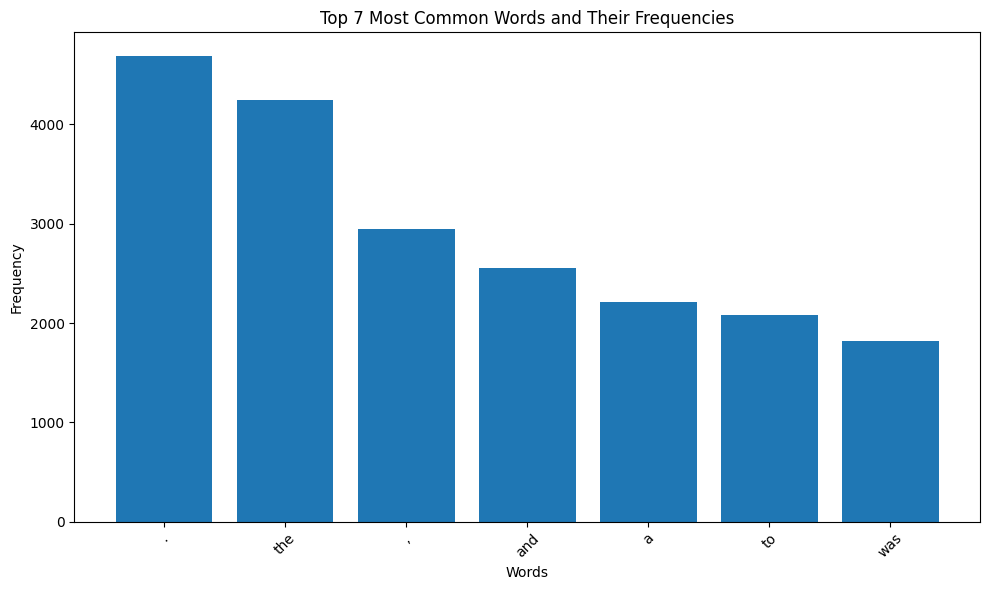

In [12]:
import matplotlib.pyplot as plt

# Sort the word frequencies by descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Take the top 7 most common words
top_words = sorted_word_frequencies[:7]

# Separate the words and frequencies
words, frequencies = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words and Their Frequencies')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
def read_text_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
        return text
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

def calculate_perplexity(text, probabilities):
    unigrams = text.split()
    likelihood = 0
    N = len(unigrams)

    for unigram in unigrams:
        if unigram in probabilities.keys():
          probability = probabilities[unigram]  # Use a small default probability for unknown bigrams
        else:
          probability = probabilities['<unk>']
        likelihood -= probability

    perplexity = 2 ** (likelihood / N)
    # perplexity = 1/N * likelihood
    return perplexity

# Usage example
file_path = '/content/A1_DATASET/A1_DATASET/val.txt'  # Replace with the path to your validation text file
validation_text = read_text_file(file_path)

if validation_text:
    perplexity = calculate_perplexity(validation_text, unigram_model)  # Assuming you have the bigram_probabilities dictionary
    print(f"UnSmoothed Unigram Model Perplexity: {perplexity:.2f}")
    perplexity = calculate_perplexity(validation_text, unigram_model_addone)  # Assuming you have the bigram_probabilities dictionary
    print(f"Laplace Smoothed Unigram Model Perplexity: {perplexity:.2f}")
    perplexity = calculate_perplexity(validation_text, unigram_model_addk)  # Assuming you have the bigram_probabilities dictionary
    print(f"Add K Smoothed Unigram Model Perplexity: {perplexity:.2f}")

UnSmoothed Unigram Model Perplexity: 56.40
Laplace Smoothed Unigram Model Perplexity: 74.16
Add K Smoothed Unigram Model Perplexity: 44.20
